In [29]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

(1.5, 4.9)

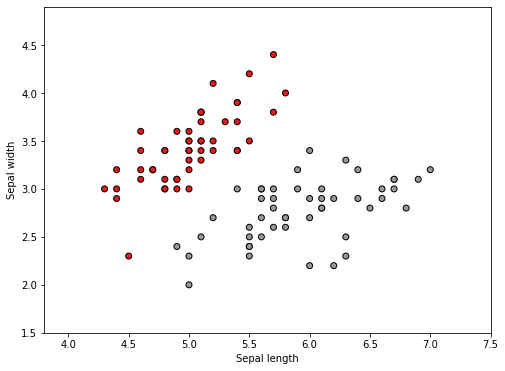

In [30]:
# Load data
iris = datasets.load_iris()
X=iris.data[0:99,:2]
y=iris.target[0:99]
# Plot the training points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [31]:
# Function for batch gradient decent    
def Batch_GD (Learning_Rate,num_iterations,X,y):
    #Step 1: Initial Parameter
    N=len(X)
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    # Starting Loop
    for i in range(num_iterations):
        #Step 2: Apply Sigmoid Function and get y prediction
        Z=np.dot(w.T,X.T)+b
        y_pred=1/(1+1/np.exp(Z))
        
        #Step 3: Calculate Loss Function
        cost=-(1/N)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        
        #Step 4: Calculate Gradient
        dw=1/N*np.dot(X.T,(y_pred-y).T)
        db=1/N*np.sum(y_pred-y)
        
        #Step 5: Update w & b
        w = w - Learning_Rate * dw
        b = b - Learning_Rate * db
        
        # Records cost
        if i % 1000 == 0:
            costs.append(cost)
            #print(cost)
    return(w,b,costs)
# Run a function
Result_BatchGD=Batch_GD(Learning_Rate=0.01,num_iterations=100000,X=X,y=y)

In [32]:
# Function for Stochastic Gradient Descent       
def Stochastic_GD (Learning_Rate,num_iterations,X,y):
    # Step 1: Initial Parameter
    N=len(X)
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    # Starting two layer of loops
    for i in range(num_iterations):
        for j in range(N):
            # Choose 1 record
            XX=X[j,:]
            yy=y[j]
            # Step 2: Apply Sigmoid Function and get y prediction
            Z=np.dot(w.T,XX.T)+b
            y_pred=1/(1+1/np.exp(Z))
            #Step 3: Calculate Loss Function
            cost=-(yy*np.log(y_pred)+(1-yy)*np.log(1-y_pred))
            #Step 4: Calculate Gradient
            dw=np.multiply(XX,(y_pred-yy)).reshape((2,1))
            db=y_pred-yy
            #Step 5: Update w & b
            w = w - Learning_Rate * dw
            b = b - Learning_Rate * db
        
        #Step 6: Calculate Loss Function       
        Z_full=np.dot(w.T,X.T)+b
        y_pred_full=1/(1+1/np.exp(Z_full))
        cost=-(1/N)*np.sum(y*np.log(y_pred_full)+(1-y)*np.log(1-y_pred_full))
        #Records cost
        if i % 100 == 0:
            costs.append(cost)
            #print(cost)
    
    return(w,b,costs)
# Run a function
Result_Stoc_GD=Stochastic_GD(Learning_Rate=0.01,num_iterations=2000,X=X,y=y)
Result_Stoc_GD

(array([[  7.14284581],
        [-10.56306387]]),
 array([-5.79360985]),
 [1.3325081573516875,
  0.13137096882828594,
  0.08247526190374843,
  0.06769752859026047,
  0.0604234336383027,
  0.05599351162082071,
  0.05294534898186317,
  0.05067264158550232,
  0.04887853848468053,
  0.04740057416402565,
  0.0461424215025978,
  0.04504341279990042,
  0.04406349287131917,
  0.04317519430439655,
  0.04235908653748464,
  0.04160106234981413,
  0.04089065104568631,
  0.0402199322593763,
  0.039582815081637225,
  0.03897454695939641])

In [36]:
# Function for mini batch Gradient Descent
def Minibatch_GD (Learning_Rate,num_iterations,X,y,Minibatch):
    # Part 1: Mini Batch 
    np.random.seed(1000)
    N=len(X)
    mini_batches=[]
    
    #Step 1: Shuffle (X,y)
    permutation=list(np.random.permutation(N))
    shuffled_X=X[permutation,:]
    shuffled_y=y[permutation]
    
    #Step 2: Partition
    num_complete_minibatches=int(np.floor(N/Minibatch))
    
    for i in range(num_complete_minibatches):
        mini_batch_X=shuffled_X[i*Minibatch:(i+1)*Minibatch,:]
        mini_batch_y=shuffled_y[i*Minibatch:(i+1)*Minibatch]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    if N % Minibatch !=0:
        mini_batch_X=shuffled_X[N-Minibatch:N,:]
        mini_batch_y=shuffled_y[N-Minibatch:N]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    # Part 2: Gradient Descent
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    
    for i in range(num_iterations):
        for j in range(num_complete_minibatches+1):
            #Select Minibatch
            XX=mini_batches[j][0]
            yy=mini_batches[j][1]
            #Step 2: Apply Sigmoid Function and get y prediction
            Z=np.dot(w.T,XX.T)+b
            y_pred=1/(1+1/np.exp(Z))
            
            #Step 3: Calculate Gradient
            dw=1/Minibatch*np.dot(XX.T,(y_pred-yy).T)
            db=1/Minibatch*np.sum(y_pred-yy)
            #Step 4: Update w & b
            w = w - Learning_Rate * dw
            b = b - Learning_Rate * db
        
        #Step 5: Calculate Loss Function       
        Z_full=np.dot(w.T,X.T)+b
        y_pred_full=1/(1+1/np.exp(Z_full))
        cost=-(1/N)*np.sum(y*np.log(y_pred_full)+(1-y)*np.log(1-y_pred_full))
        
        if i % 1000 ==0:
            costs.append(cost)
            #print(cost)
            
    return(w,b,costs)
# Run a function
Result_MiniGD=Minibatch_GD(Learning_Rate=0.01,num_iterations=100000,X=X,y=y,Minibatch=50)
Result_MiniGD[1]

-5.862588193986869

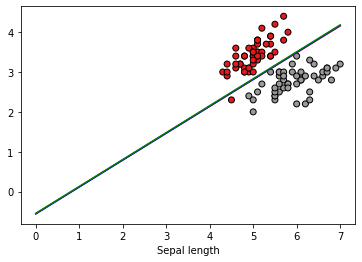

In [34]:
# Plot linear classification
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
line_B_GD=mlines.Line2D([0,7],[-0.5527,4.1577],color='red')
line_Mini_GD=mlines.Line2D([0,7],[-0.56185,4.1674],color='blue')
line_Sto_GD=mlines.Line2D([0,7],[-0.5488,4.1828],color='green')
ax.add_line(line_B_GD)
ax.add_line(line_Mini_GD)
ax.add_line(line_Sto_GD)
ax.set_xlabel('Sepal length')
plt.show()